In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

GRIEWANK FUNCTION

$$f(\textbf{x}) = f(x_1, ..., x_n) = 1 + \sum_{i=1}^{n} \frac{x_i^{2}}{4000} - \prod_{i=1}^{n}cos(\frac{x_i}{\sqrt{i}})$$

In [2]:
def griewank(x):
    n = len(x)
    indices = np.array(range(1, n+1))
    sum_term = np.sum(x*x/4000)
    prod_term = np.prod(np.cos(x/np.sqrt(indices)))
    return 1 + sum_term - prod_term

In [3]:
x = np.array([1,2])
griewank(x)

0.9157432621326708

In [4]:
n = 100
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)

X, Y = np.meshgrid(x, y)
Z = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        x = np.array([X[i][j], Y[i][j]])
        Z[i][j] = griewank(x)

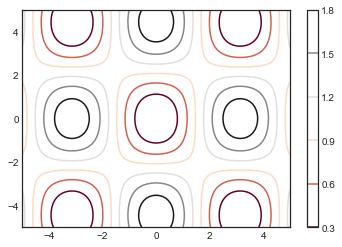

In [5]:
plt.contour(X, Y, Z, cmap='RdGy')
plt.colorbar();

RASTRIGIN FUNCTION

$$f(x, y)=10n + \sum_{i=1}^{n}(x_i^2 - 10cos(2\pi x_i))$$

In [6]:
def rastrigin(x):
    n = len(x)
    indices = np.array(range(1, n+1))
    sum_term = np.sum(x*x - 10*np.cos(2*np.pi*x))
    return 10*n + sum_term

In [7]:
n = 100
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)

X, Y = np.meshgrid(x, y)
Z = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        x = np.array([X[i][j], Y[i][j]])
        Z[i][j] = rastrigin(x)

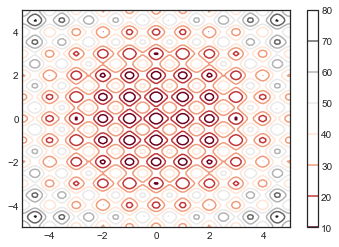

In [8]:
plt.contour(X, Y, Z, cmap='RdGy')
plt.colorbar();

ACKLEY FUNCTION

$$f(\textbf{x}) = f(x_1, ..., x_n)= -a.exp(-b\sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2})-exp(\frac{1}{n}\sum_{i=1}^{n}cos(cx_i))+ a + exp(1)$$

$$ \text{Usually, } a=20, b=0.2, c=2\pi $$


In [9]:
a = 20
b = 0.2
c = 2*np.pi
def ackley(x):
    n = len(x)
    indices = np.array(range(1, n+1))
    term_1 = -a * np.exp(-b * np.sqrt(1.0/n * np.sum(x*x)))
    term_2 = -np.exp(1.0/n * np.sum(np.cos(c*x)))
    return term_1 + term_2 + a + np.exp(1)

In [10]:
n = 100
x = np.linspace(-32, 32, n)
y = np.linspace(-32, 32, n)

X, Y = np.meshgrid(x, y)
Z = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        x = np.array([X[i][j], Y[i][j]])
        Z[i][j] = ackley(x)

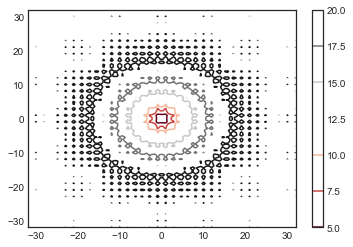

In [11]:
plt.contour(X, Y, Z, cmap='RdGy')
plt.colorbar();

In [12]:
def grad_ack(x):
    n = len(x)
    grad = [-a * np.exp(-b * np.sqrt(1.0/n * np.sum(x*x))) * -b * 0.5 * (1.0/n) * 2*x[i] / np.sqrt(1.0/n * np.sum(x*x))\
                - np.exp(1.0/n * np.sum(np.cos(c*x))) * (1.0/n) * -np.sin(c*x[i]) * c for i in range(n)]
    return grad

def grad_ras(x):
    n = len(x)
    grad = [2*x[i] + 10*np.sin(2*np.pi*x[i])*2*np.pi for i in range(n)]
    return np.array(grad)

def grad_griewank(x):
    n = len(x)
    indices = np.array(range(1, n+1))
    grad = [2*x[i]/4000 + np.prod(np.cos(x/np.sqrt(indices))) * (1/np.cos(x[i] / np.sqrt(i+1))) * np.sin(x[i] / np.sqrt(i+1)) * (1.0 / np.sqrt(i+1)) for i in range(n)]
    return np.array(grad)

In [13]:
x = np.array([0, 0])

print grad_ack(x), grad_ras(x), grad_griewank(x)

[nan, nan] [0. 0.] [0. 0.]


/Users/kartik/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
alpha = 0.1
def grad_descent_rast(x0, alpha=0.01, n_iter=1000):
    x_vals = []
    obj_vals = []
    grad_vals = []
    n = len(x0)
    x_curr = x0
    for i in range(n_iter):
        print("------------------------")
        print("Iteration: ", i)
        print(x_curr, rastrigin(x_curr))
        print("------------------------")
        
        grad = grad_ras(x_curr)
        
        x_vals.append(x_curr)
        obj_vals.append(rastrigin(x_curr))
        grad_vals.append(grad)
        
        if np.array_equal(grad, np.zeros(n)):
            print("Solution found!", x_curr, rastrigin(x_curr))
            return x_curr
        x_next = x_curr - alpha*grad
        x_curr = x_next
    
    results_df = pd.DataFrame({'x': x_vals, 'obj': obj_vals, 'grad': grad_vals})
    return x_curr, results_df

def grad_descent_griewank(x0, alpha=0.01, n_iter=1000):
    x_vals = []
    obj_vals = []
    grad_vals = []
    
    n = len(x0)
    x_curr = x0
    for i in range(n_iter):
        print("------------------------")
        print("Iteration: ", i)
        print(x_curr, griewank(x_curr))
        print("------------------------")
        
        grad = grad_griewank(x_curr)
        
        x_vals.append(x_curr)
        obj_vals.append(griewank(x_curr))
        grad_vals.append(grad)
        
        if np.array_equal(grad, np.zeros(n)):
            print("Solution found!", x_curr, griewank(x_curr))
            return x_curr
        x_next = x_curr - alpha*grad
        x_curr = x_next
    results_df = pd.DataFrame({'x': x_vals, 'obj': obj_vals, 'grad': grad_vals})
    return x_curr, results_df

In [15]:
x = np.array([1, 2])
final_x , results_df = grad_descent_rast(x)

------------------------
('Iteration: ', 0)
(array([1, 2]), 5.0)
------------------------
------------------------
('Iteration: ', 1)
(array([0.98, 1.96]), 5.1950213755689045)
------------------------
------------------------
('Iteration: ', 2)
(array([1.03914919, 2.07705646]), 6.844344737521542)
------------------------
------------------------
('Iteration: ', 3)
(array([0.86536529, 1.74305498]), 17.593010046461547)
------------------------
------------------------
('Iteration: ', 4)
(array([1.31841175, 2.33591429]), 36.50176913905366)
------------------------
------------------------
('Iteration: ', 5)
(array([0.72088256, 1.75022214]), 25.388306116359292)
------------------------
------------------------
('Iteration: ', 6)
(array([1.32429757, 2.34353561]), 37.290956535096214)
------------------------
------------------------
('Iteration: ', 7)
(array([0.73672221, 1.77376739]), 23.034506397501342)
------------------------
------------------------
('Iteration: ', 8)
(array([1.348121  ,

(array([0.71722651, 2.34593653]), 33.73193357602392)
------------------------
------------------------
('Iteration: ', 349)
(array([1.31792596, 1.78143491]), 27.087664202961786)
------------------------
------------------------
('Iteration: ', 350)
(array([0.71960994, 2.36190895]), 34.460530235435684)
------------------------
------------------------
('Iteration: ', 351)
(array([1.32211663, 1.83538149]), 24.38333354874459)
------------------------
------------------------
('Iteration: ', 352)
(array([0.73076273, 2.33872582]), 32.49992604702149)
------------------------
------------------------
('Iteration: ', 353)
(array([1.33988176, 1.75876611]), 29.690022602960155)
------------------------
------------------------
('Iteration: ', 354)
(array([0.78232726, 2.35095649]), 30.04815506894666)
------------------------
------------------------
('Iteration: ', 355)
(array([1.38208248, 1.79784568]), 29.559875338445295)
------------------------
------------------------
('Iteration: ', 356)
(arr

(array([0.87195183, 2.34067988]), 24.699016771285383)
------------------------
------------------------
('Iteration: ', 441)
(array([1.3072282 , 1.76480242]), 27.413417836939573)
------------------------
------------------------
('Iteration: ', 442)
(array([0.69294838, 2.35510933]), 35.66959463179263)
------------------------
------------------------
('Iteration: ', 443)
(array([1.2674696 , 1.81180276]), 22.19822989232709)
------------------------
------------------------
('Iteration: ', 444)
(array([0.61758297, 2.35710514]), 39.56319959921859)
------------------------
------------------------
('Iteration: ', 445)
(array([1.02833975, 1.81863099]), 10.343211307953542)
------------------------
------------------------
('Iteration: ', 446)
(array([0.89648239, 2.3530581 ]), 24.414476608184586)
------------------------
------------------------
('Iteration: ', 447)
(array([1.25901278, 1.80486622]), 22.029172602847922)
------------------------
------------------------
('Iteration: ', 448)
(ar

(array([1.19210636, 1.75331969]), 20.72880647933797)
------------------------
------------------------
('Iteration: ', 686)
(array([0.58105852, 2.34643515]), 40.269403898016996)
------------------------
------------------------
('Iteration: ', 687)
(array([0.87578736, 1.7830421 ]), 14.779065368777463)
------------------------
------------------------
('Iteration: ', 688)
(array([1.30035652, 2.36220754]), 36.86291439874505)
------------------------
------------------------
('Iteration: ', 689)
(array([0.67721939, 1.83643718]), 23.078414492675222)
------------------------
------------------------
('Iteration: ', 690)
(array([1.22743413, 2.33761841]), 30.789272379499526)
------------------------
------------------------
('Iteration: ', 691)
(array([0.58087193, 1.75538083]), 31.817293779590045)
------------------------
------------------------
('Iteration: ', 692)
(array([0.87496116, 2.34823268]), 24.99806749562568)
------------------------
------------------------
('Iteration: ', 693)
(ar

(array([1.34498078, 2.33576456]), 38.01630839094312)
------------------------
------------------------
('Iteration: ', 755)
(array([0.79836847, 1.7497718 ]), 20.72091728376689)
------------------------
------------------------
('Iteration: ', 756)
(array([1.38192649, 2.34309425]), 40.293219624679004)
------------------------
------------------------
('Iteration: ', 757)
(array([0.92974984, 1.77237078]), 13.563192068537823)
------------------------
------------------------
('Iteration: ', 758)
(array([1.17957312, 2.35904525]), 29.002344207618474)
------------------------
------------------------
('Iteration: ', 759)
(array([0.58818164, 1.82534274]), 27.622696945493292)
------------------------
------------------------
('Iteration: ', 760)
(array([0.90700499, 2.34805621]), 23.773678512034763)
------------------------
------------------------
('Iteration: ', 761)
(array([1.23545778, 1.78830221]), 21.428501675132495)
------------------------
------------------------
('Iteration: ', 762)
(a

In [16]:
results_df.tail()

,grad,obj,x
995,"[-28.99365463289308, -50.7282951183832]",27.465518,"[0.5796634593020429, 1.8334286700179885]"
996,"[-44.1712027388307, 57.58104814853695]",24.803973,"[0.8696000056309736, 2.3407116212018204]"
997,"[60.849543281039125, -59.02686164052957]",27.657284,"[1.3113120330192807, 1.764901139716451]"
998,"[-58.6852459599798, 54.316139710238204]",35.099655,"[0.7028166002088894, 2.3551697561217466]"
999,"[63.46957271904036, -54.49904506741352]",23.615097,"[1.2896690598086873, 1.8120083590193645]"


In [46]:
x = np.array([3.2, 0])
final_x , results_df = grad_descent_griewank(x)

------------------------
('Iteration: ', 0)
(array([3.2, 0. ]), 2.0008547757947532)
------------------------
------------------------
('Iteration: ', 1)
(array([3.20056774, 0.        ]), 2.0008223819531556)
------------------------
------------------------
('Iteration: ', 2)
(array([3.20114115, 0.        ]), 2.000789338454716)
------------------------
------------------------
('Iteration: ', 3)
(array([3.20172028, 0.        ]), 2.000755632293158)
------------------------
------------------------
('Iteration: ', 4)
(array([3.20230518, 0.        ]), 2.000721250202726)
------------------------
------------------------
('Iteration: ', 5)
(array([3.20289592, 0.        ]), 2.000686178653043)
------------------------
------------------------
('Iteration: ', 6)
(array([3.20349256, 0.        ]), 2.000650403843873)
------------------------
------------------------
('Iteration: ', 7)
(array([3.20409514, 0.        ]), 2.0006139116997748)
------------------------
------------------------
('Iteratio

('Iteration: ', 334)
(array([4.47855769, 0.        ]), 1.2367206121646257)
------------------------
------------------------
('Iteration: ', 335)
(array([4.48826315, 0.        ]), 1.2272902655718096)
------------------------
------------------------
('Iteration: ', 336)
(array([4.4979906, 0.       ]), 1.21781760240317)
------------------------
------------------------
('Iteration: ', 337)
(array([4.50773915, 0.        ]), 1.2083042334405185)
------------------------
------------------------
('Iteration: ', 338)
(array([4.51750794, 0.        ]), 1.1987517998533852)
------------------------
------------------------
('Iteration: ', 339)
(array([4.52729606, 0.        ]), 1.1891619721788658)
------------------------
------------------------
('Iteration: ', 340)
(array([4.53710261, 0.        ]), 1.1795364492559466)
------------------------
------------------------
('Iteration: ', 341)
(array([4.54692669, 0.        ]), 1.1698769571155458)
------------------------
------------------------
('It

------------------------
('Iteration: ', 671)
(array([6.19417487, 0.        ]), 0.01355076507839792)
------------------------
------------------------
('Iteration: ', 672)
(array([6.19503282, 0.        ]), 0.013477522558505872)
------------------------
------------------------
('Iteration: ', 673)
(array([6.19588223, 0.        ]), 0.013405732631020517)
------------------------
------------------------
('Iteration: ', 674)
(array([6.19672318, 0.        ]), 0.01333536659352108)
------------------------
------------------------
('Iteration: ', 675)
(array([6.19755574, 0.        ]), 0.013266396306583217)
------------------------
------------------------
('Iteration: ', 676)
(array([6.19838, 0.     ]), 0.013198794182898932)
------------------------
------------------------
('Iteration: ', 677)
(array([6.19919604, 0.        ]), 0.013132533176599903)
------------------------
------------------------
('Iteration: ', 678)
(array([6.20000395, 0.        ]), 0.013067586772779305)
-----------------

In [47]:
results_df.tail()

,grad,obj,x
995,"[-0.003307365764859581, 0.0]",0.00987,"[6.276739527016344, 0.0]"
996,"[-0.0032742762539343865, 0.0]",0.00987,"[6.276772600673993, 0.0]"
997,"[-0.0032415177898167985, 0.0]",0.00987,"[6.276805343436532, 0.0]"
998,"[-0.003209087060693828, 0.0]",0.00987,"[6.27683775861443, 0.0]"
999,"[-0.0031769807878789993, 0.0]",0.00987,"[6.2768698494850375, 0.0]"


In [61]:
def heavy_ball_griewank(x0, alpha=0.01, beta=0.5, n_iter=1000):
    x_vals = []
    obj_vals = []
    grad_vals = []
    
    n = len(x0)
    x_curr = x0
    x_prev = x0
    for i in range(n_iter):
        print("------------------------")
        print("Iteration: ", i)
        print(x_curr, griewank(x_curr))
        print("------------------------")
        
        grad = grad_griewank(x_curr)
        
        x_vals.append(x_curr)
        obj_vals.append(griewank(x_curr))
        grad_vals.append(grad)
        
        if np.array_equal(grad, np.zeros(n)):
            print("Solution found!", x_curr, griewank(x_curr))
            return x_curr
        x_next = x_curr - alpha*grad + beta*(x_curr - x_prev)
        print("Momentum!", x_curr-x_prev)
        x_prev = x_curr
        x_curr = x_next
    results_df = pd.DataFrame({'x': x_vals, 'obj': obj_vals, 'grad': grad_vals})
    return x_curr, results_df

In [62]:
x = np.array([3.2, 0])
final_x , results_df = heavy_ball_griewank(x)

------------------------
('Iteration: ', 0)
(array([3.2, 0. ]), 2.0008547757947532)
------------------------
('Momentum!', array([0., 0.]))
------------------------
('Iteration: ', 1)
(array([3.20056774, 0.        ]), 2.0008223819531556)
------------------------
('Momentum!', array([0.00056774, 0.        ]))
------------------------
('Iteration: ', 2)
(array([3.20142502, 0.        ]), 2.0007728585252122)
------------------------
('Momentum!', array([0.00085728, 0.        ]))
------------------------
('Iteration: ', 3)
(array([3.20243562, 0.        ]), 2.0007135363258977)
------------------------
('Momentum!', array([0.0010106, 0.       ]))
------------------------
('Iteration: ', 4)
(array([3.20353296, 0.        ]), 2.00064796845509)
------------------------
('Momentum!', array([0.00109734, 0.        ]))
------------------------
('Iteration: ', 5)
(array([3.20468462, 0.        ]), 2.000577863040337)
------------------------
('Momentum!', array([0.00115166, 0.        ]))
---------------

('Momentum!', array([0.00513496, 0.        ]))
------------------------
('Iteration: ', 286)
(array([6.03591918, 0.        ]), 0.03952290807074277)
------------------------
('Momentum!', array([0.00503364, 0.        ]))
------------------------
('Iteration: ', 287)
(array([6.04085337, 0.        ]), 0.03834195140133012)
------------------------
('Momentum!', array([0.00493418, 0.        ]))
------------------------
('Iteration: ', 288)
(array([6.04568992, 0.        ]), 0.03720730997236288)
------------------------
('Momentum!', array([0.00483656, 0.        ]))
------------------------
('Iteration: ', 289)
(array([6.05043067, 0.        ]), 0.03611722251822025)
------------------------
('Momentum!', array([0.00474074, 0.        ]))
------------------------
('Iteration: ', 290)
(array([6.05507737, 0.        ]), 0.035069990453991284)
------------------------
('Momentum!', array([0.00464671, 0.        ]))
------------------------
('Iteration: ', 291)
(array([6.0596318, 0.       ]), 0.0340639

(array([6.2782048, 0.       ]), 0.009866366585731368)
------------------------
('Momentum!', array([3.83971437e-05, 0.00000000e+00]))
------------------------
('Iteration: ', 524)
(array([6.27824241, 0.        ]), 0.009866298034283294)
------------------------
('Momentum!', array([3.76124561e-05, 0.00000000e+00]))
------------------------
('Iteration: ', 525)
(array([6.27827925, 0.        ]), 0.009866232256054097)
------------------------
('Momentum!', array([3.68438043e-05, 0.00000000e+00]))
------------------------
('Iteration: ', 526)
(array([6.27831534, 0.        ]), 0.009866169138855185)
------------------------
('Momentum!', array([3.60908607e-05, 0.00000000e+00]))
------------------------
('Iteration: ', 527)
(array([6.2783507, 0.       ]), 0.009866108575036114)
------------------------
('Momentum!', array([3.53533041e-05, 0.00000000e+00]))
------------------------
('Iteration: ', 528)
(array([6.27838533, 0.        ]), 0.009866050461301401)
------------------------
('Momentum!',

('Momentum!', array([3.68688992e-07, 0.00000000e+00]))
------------------------
('Iteration: ', 749)
(array([6.28002797, 0.        ]), 0.009864672210917136)
------------------------
('Momentum!', array([3.6115437e-07, 0.0000000e+00]))
------------------------
('Iteration: ', 750)
(array([6.28002832, 0.        ]), 0.009864672204852543)
------------------------
('Momentum!', array([3.53773728e-07, 0.00000000e+00]))
------------------------
('Iteration: ', 751)
(array([6.28002867, 0.        ]), 0.009864672199033309)
------------------------
('Momentum!', array([3.46543918e-07, 0.00000000e+00]))
------------------------
('Iteration: ', 752)
(array([6.28002901, 0.        ]), 0.009864672193449442)
------------------------
('Momentum!', array([3.39461858e-07, 0.00000000e+00]))
------------------------
('Iteration: ', 753)
(array([6.28002934, 0.        ]), 0.009864672188091506)
------------------------
('Momentum!', array([3.3252453e-07, 0.0000000e+00]))
------------------------
('Iteration: '

In [63]:
results_df.tail()

,grad,obj,x
995,"[-1.07791408167357e-07, 0.0]",0.009865,"[6.280045171641834, 0.0]"
996,"[-1.0558855581327062e-07, 0.0]",0.009865,"[6.280045173843597, 0.0]"
997,"[-1.0343072174168882e-07, 0.0]",0.009865,"[6.280045176000363, 0.0]"
998,"[-1.0131698623475072e-07, 0.0]",0.009865,"[6.280045178113053, 0.0]"
999,"[-9.924644734293428e-08, 0.0]",0.009865,"[6.280045180182567, 0.0]"


In [6]:
import math
1e-5 == math.pow(10, -5)

True